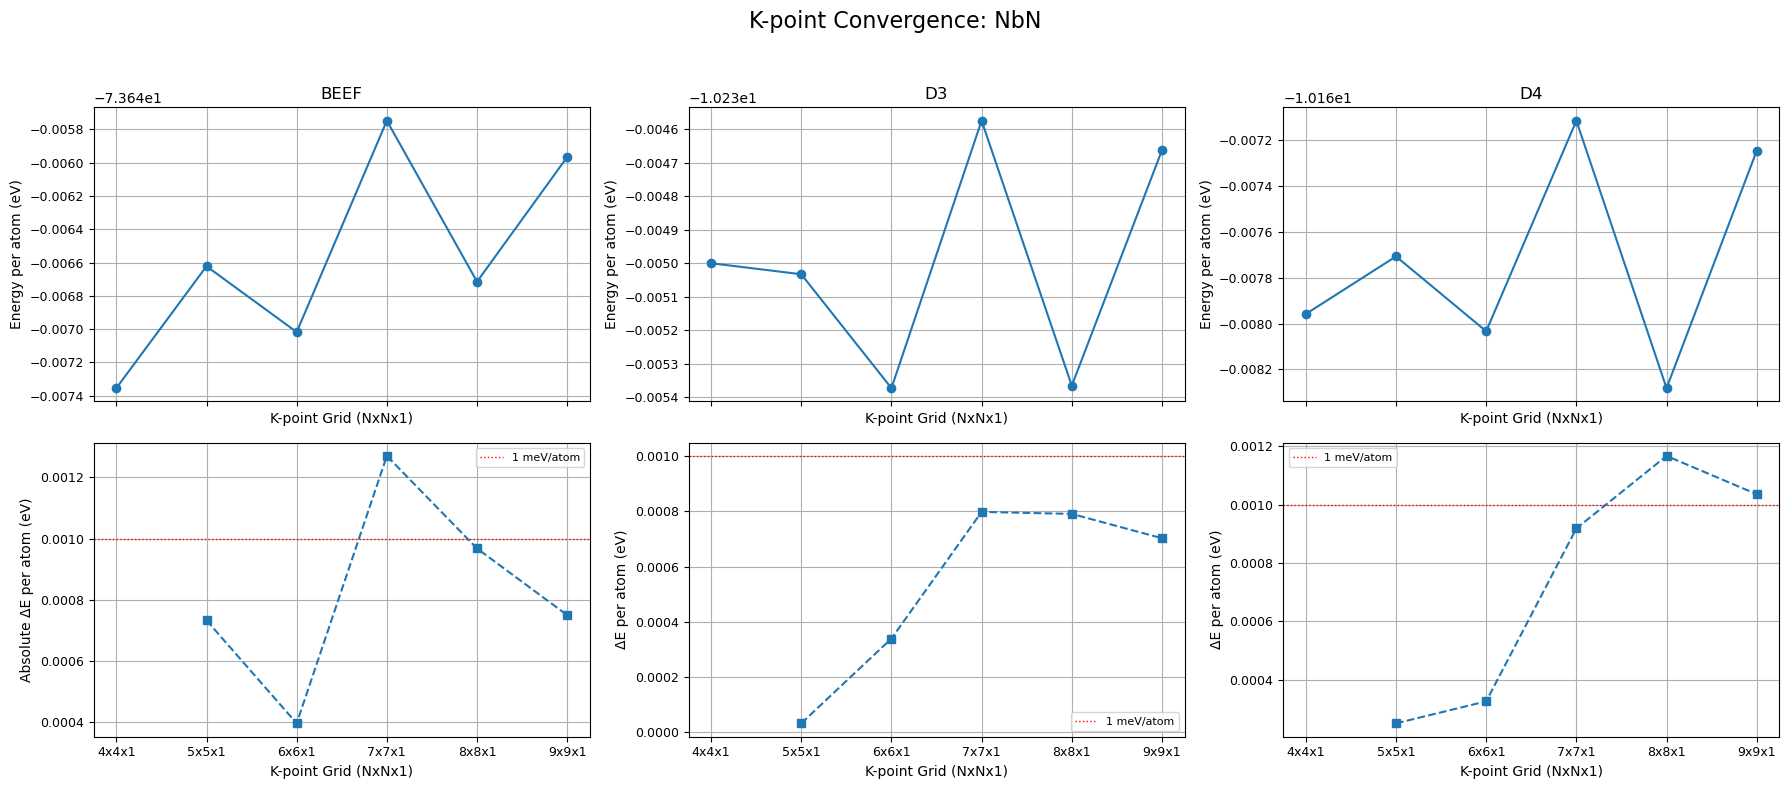

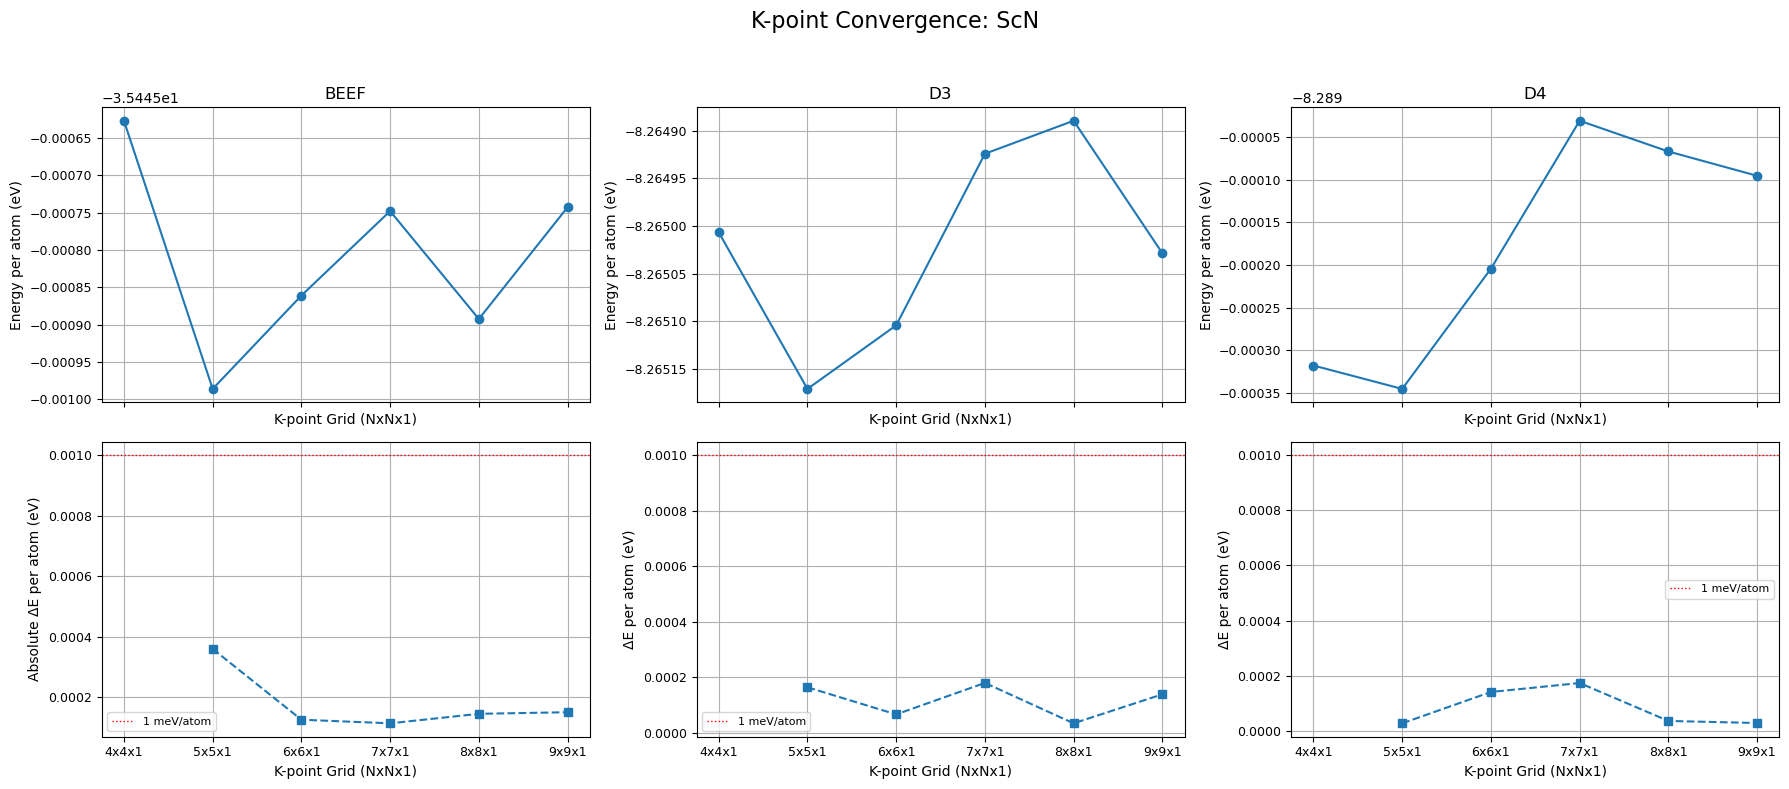

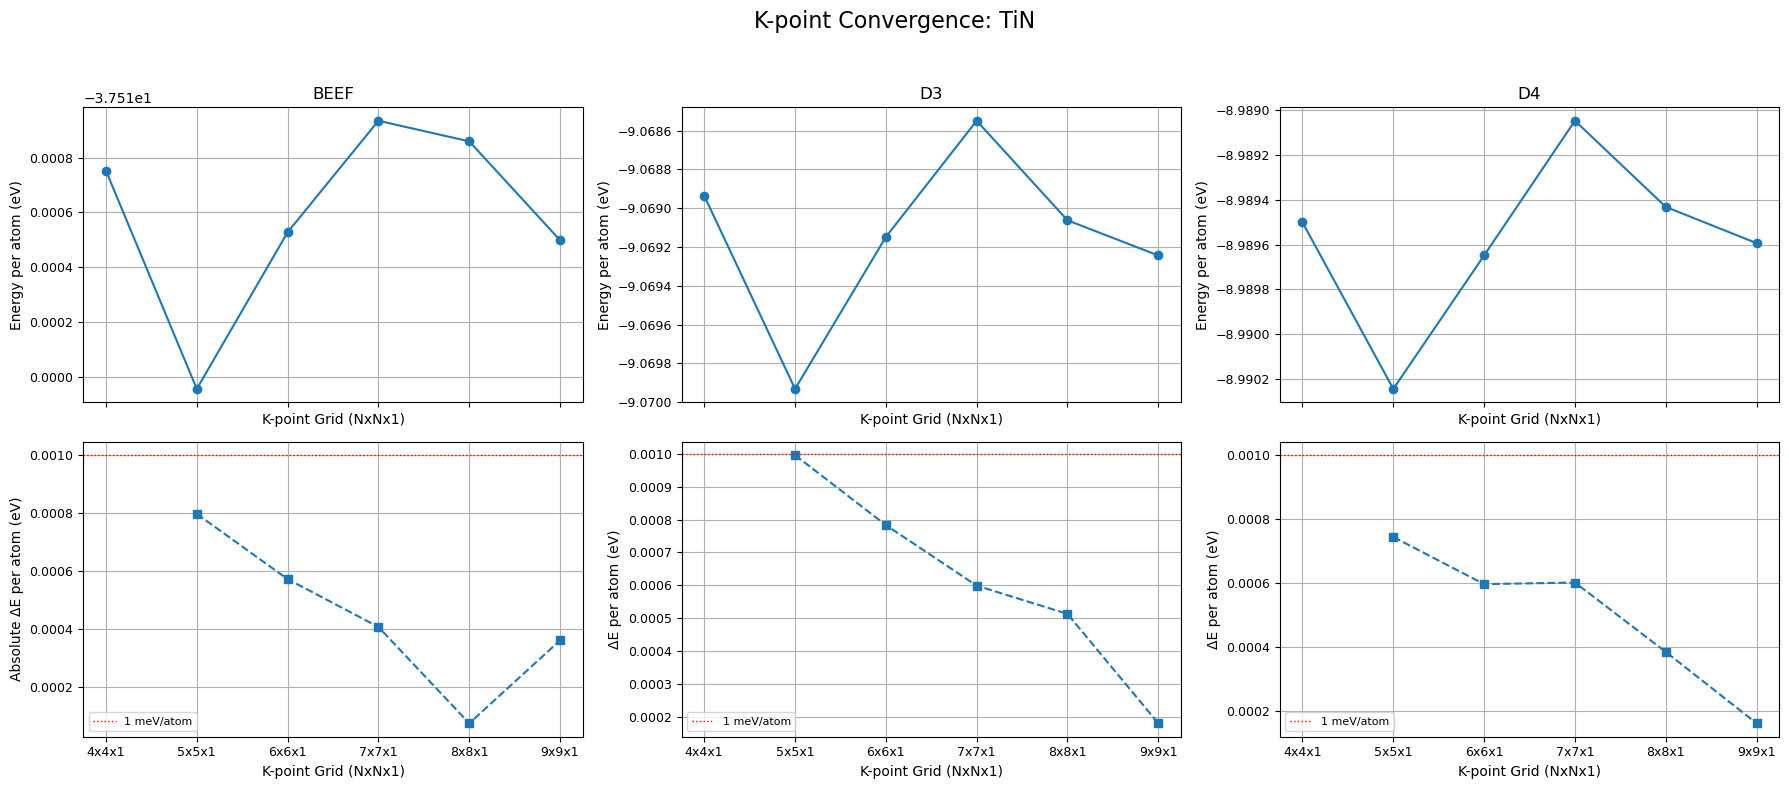

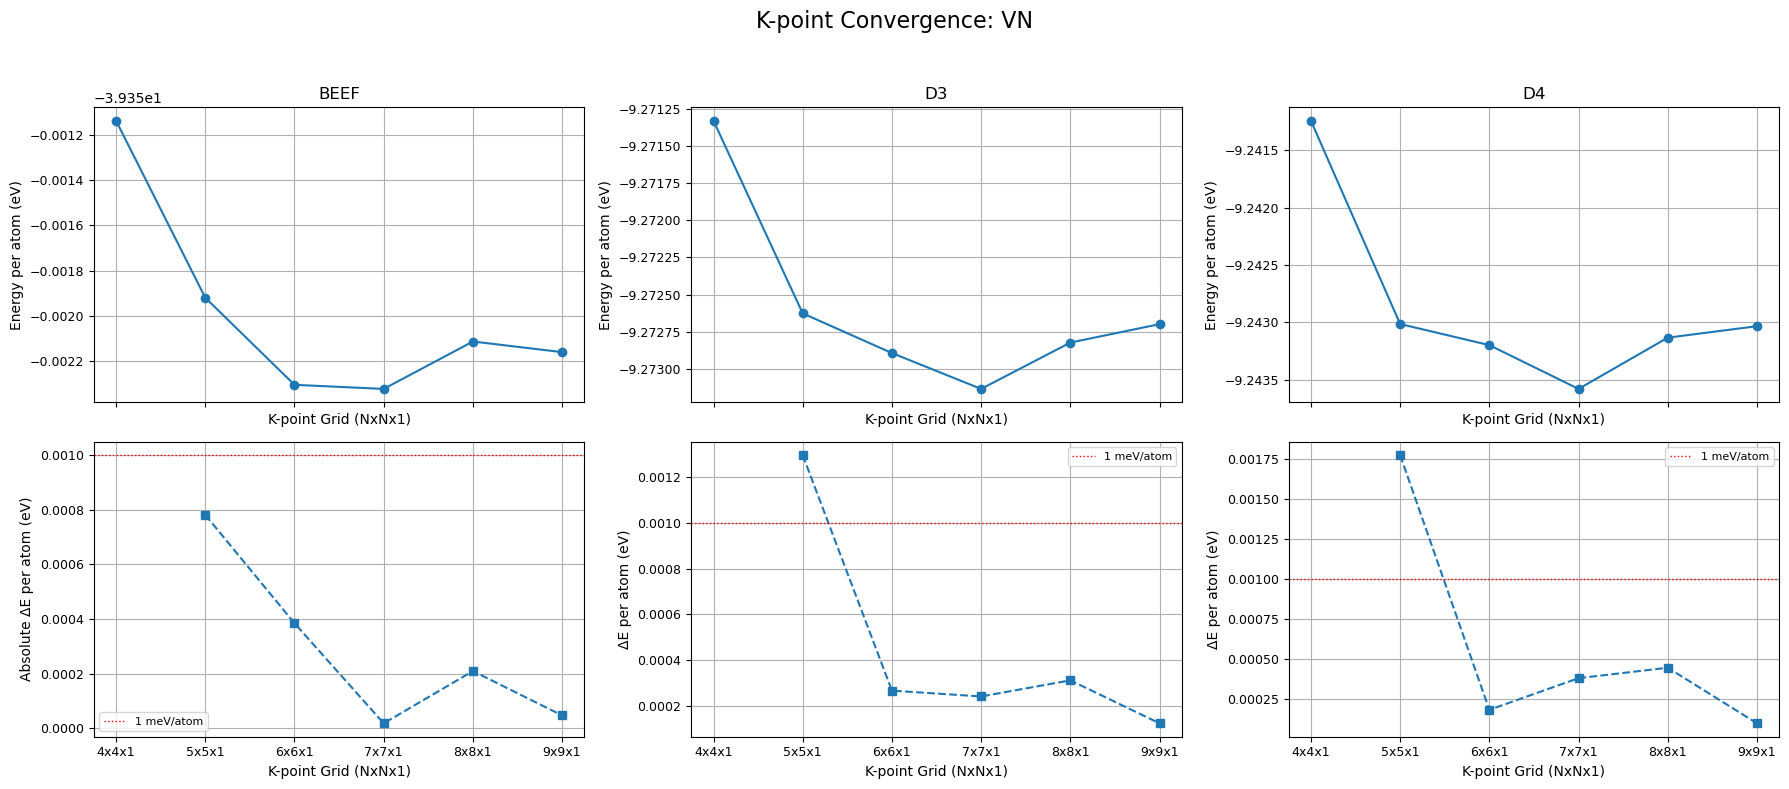

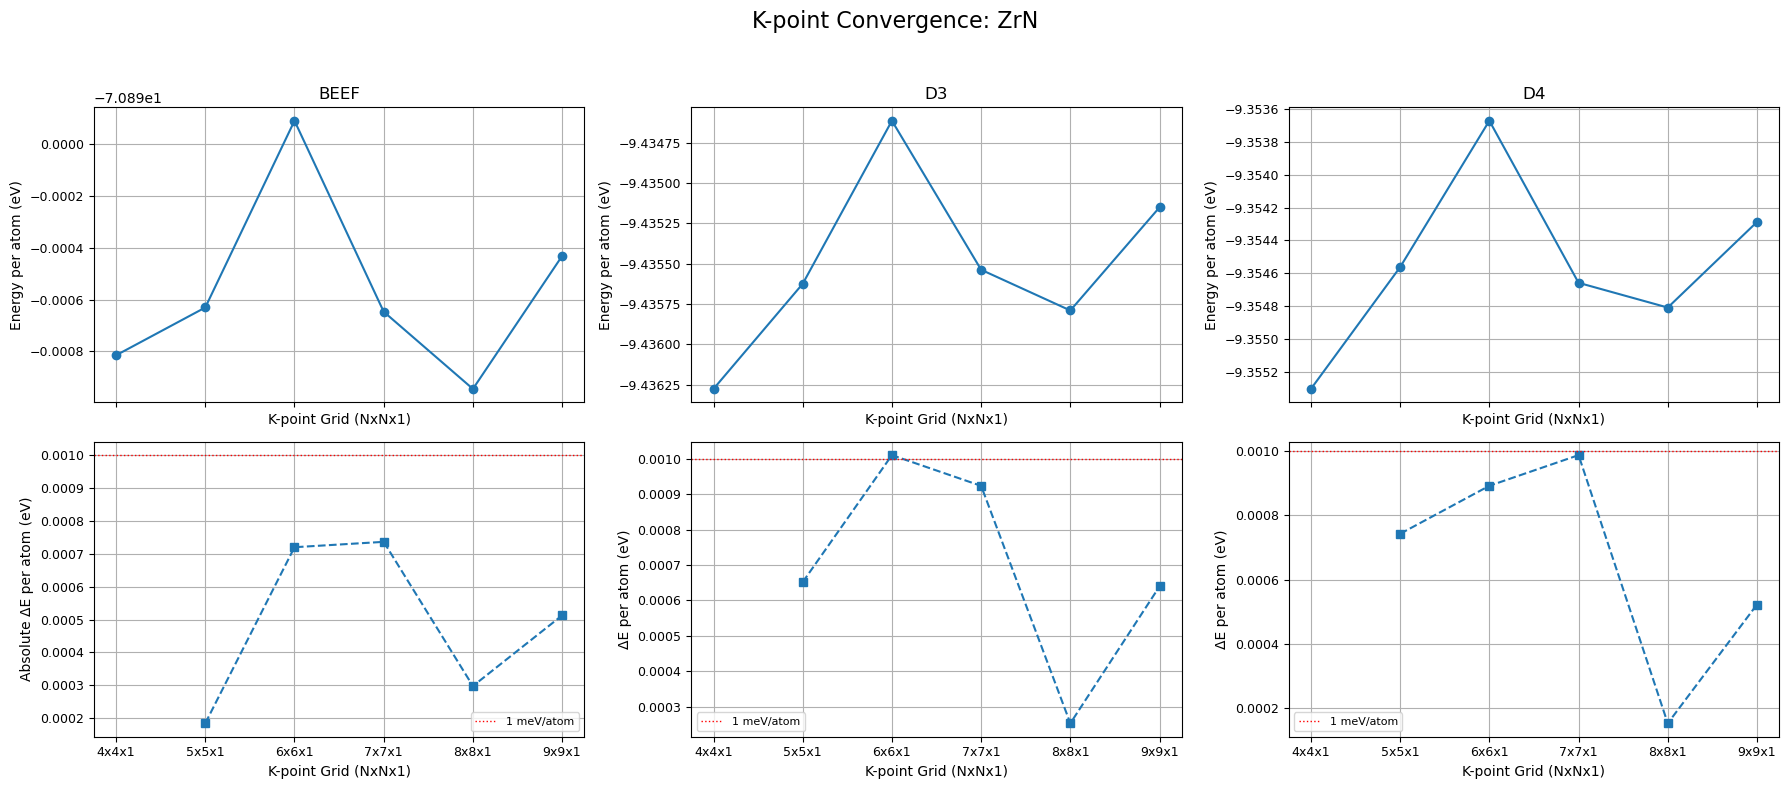

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# ======= CONFIGURATION =======
n_atoms = 64
csv_files = sorted(glob("*_kpoints_convergence.csv"))

# ======= LOAD & ORGANIZE =======
data_by_metal = {}

for file in csv_files:
    filename = os.path.basename(file).replace('_kpoints_convergence.csv', '')
    metal, functional = filename.split('_', 1)

    df = pd.read_csv(file)
    df['Functional'] = functional
    df['Energy_per_atom'] = df['Energy (eV)'] / n_atoms
    df = df.sort_values(by='Kpoints').reset_index(drop=True)
    df['ΔE_per_atom'] = df['Energy_per_atom'].diff()

    if metal not in data_by_metal:
        data_by_metal[metal] = []
    data_by_metal[metal].append(df)

# ======= PLOT ENERGY AND ΔE =======
for metal, dfs in data_by_metal.items():
    fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex='col', sharey=False)
    fig.suptitle(f'K-point Convergence: {metal}', fontsize=16)

    for i, df in enumerate(dfs[:3]):
        label = df['Functional'].iloc[0]

        # Plot Energy per Atom
        ax1 = axes[0, i]
        ax1.plot(df['Kpoints'], df['Energy_per_atom'], marker='o')
        ax1.set_title(f'{label}', fontsize=12)
        ax1.set_ylabel('Energy per atom (eV)', fontsize=10)
        ax1.set_xlabel('K-point Grid (NxNx1)', fontsize=10)
        ax1.tick_params(axis='both', labelsize=9)
        ax1.grid(True)

        # Plot ΔE per Atom
        ax2 = axes[1, i]
        ax2.plot(df['Kpoints'][1:], abs(df['ΔE_per_atom'][1:]), marker='s', linestyle='--')
        ax2.axhline(0.001, color='red', linestyle=':', linewidth=1, label='1 meV/atom')  # Add convergence line
        ax2.set_ylabel('ΔE per atom (eV)', fontsize=10)
        ax2.set_xlabel('K-point Grid (NxNx1)', fontsize=10)
        ax2.tick_params(axis='both', labelsize=9)
        ax2.grid(True)
        ax2.legend(fontsize=8, loc='best')

    axes[0, 0].set_ylabel('Energy per atom (eV)', fontsize=10)
    axes[1, 0].set_ylabel('Absolute ΔE per atom (eV)', fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


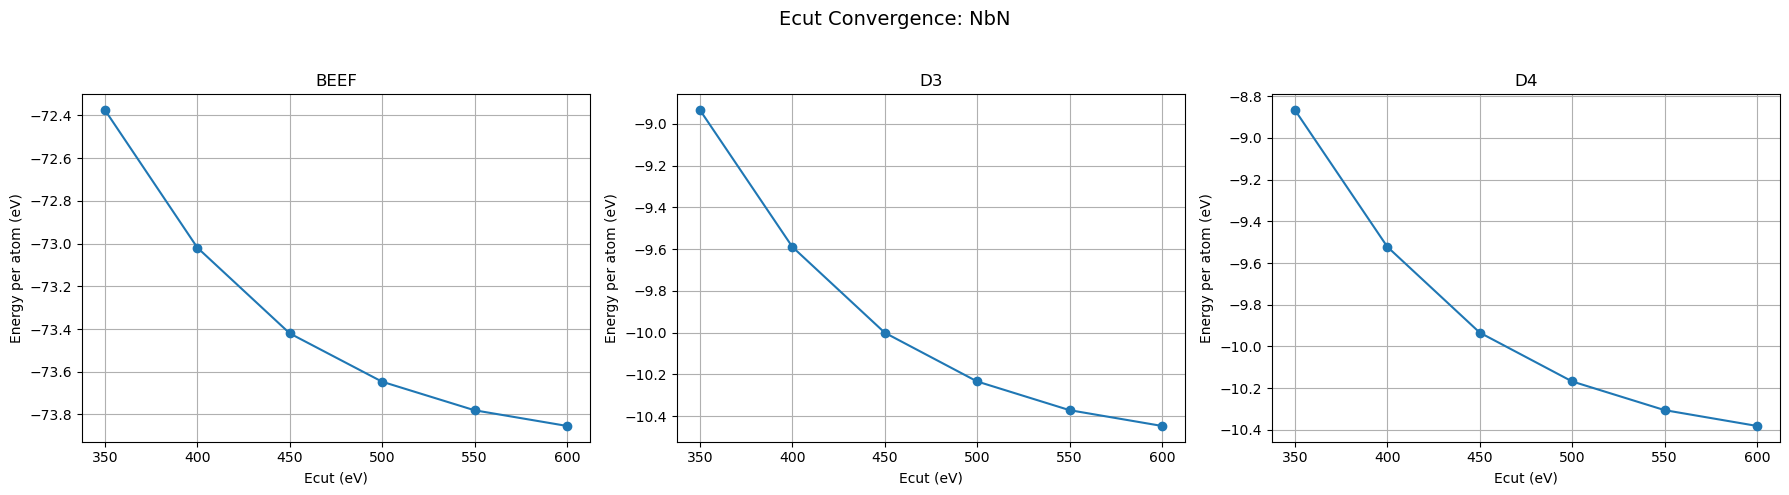

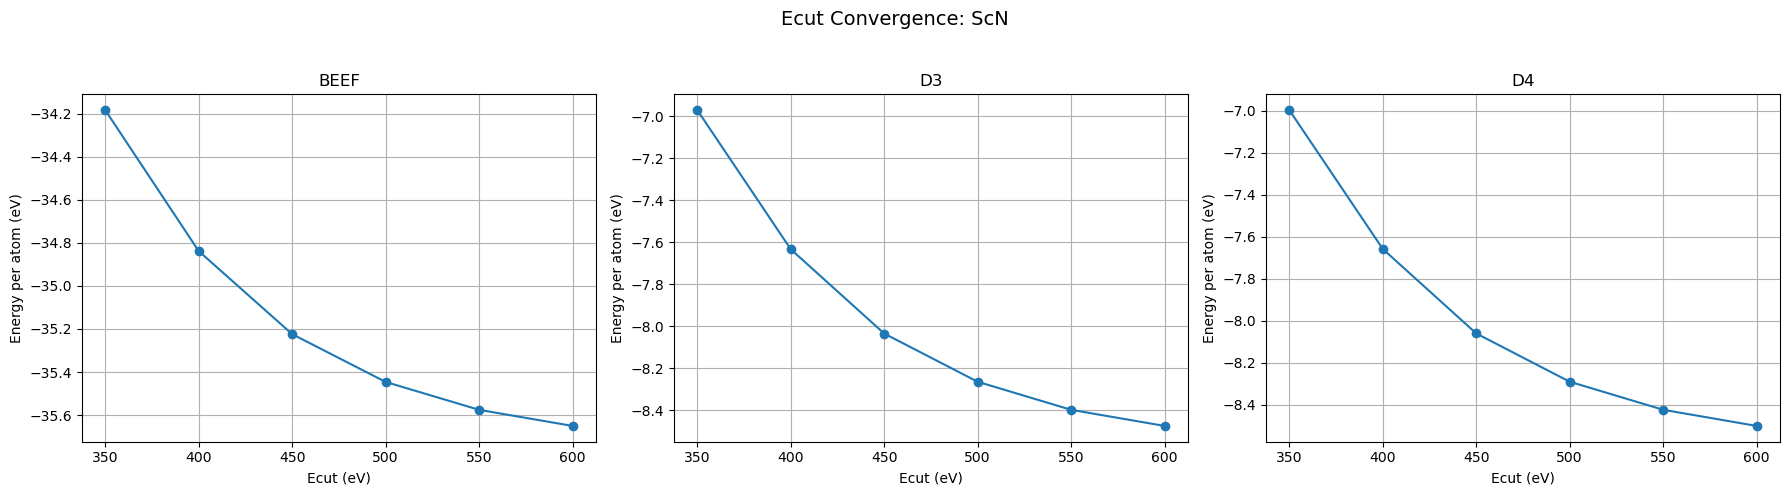

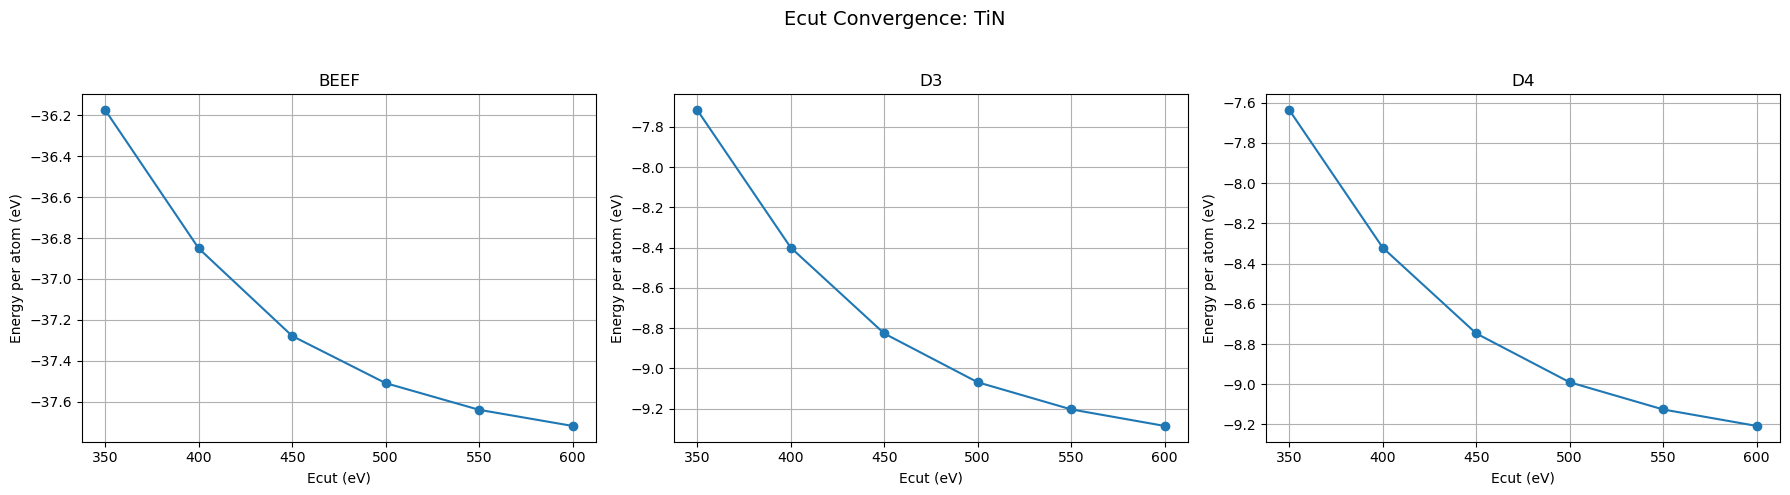

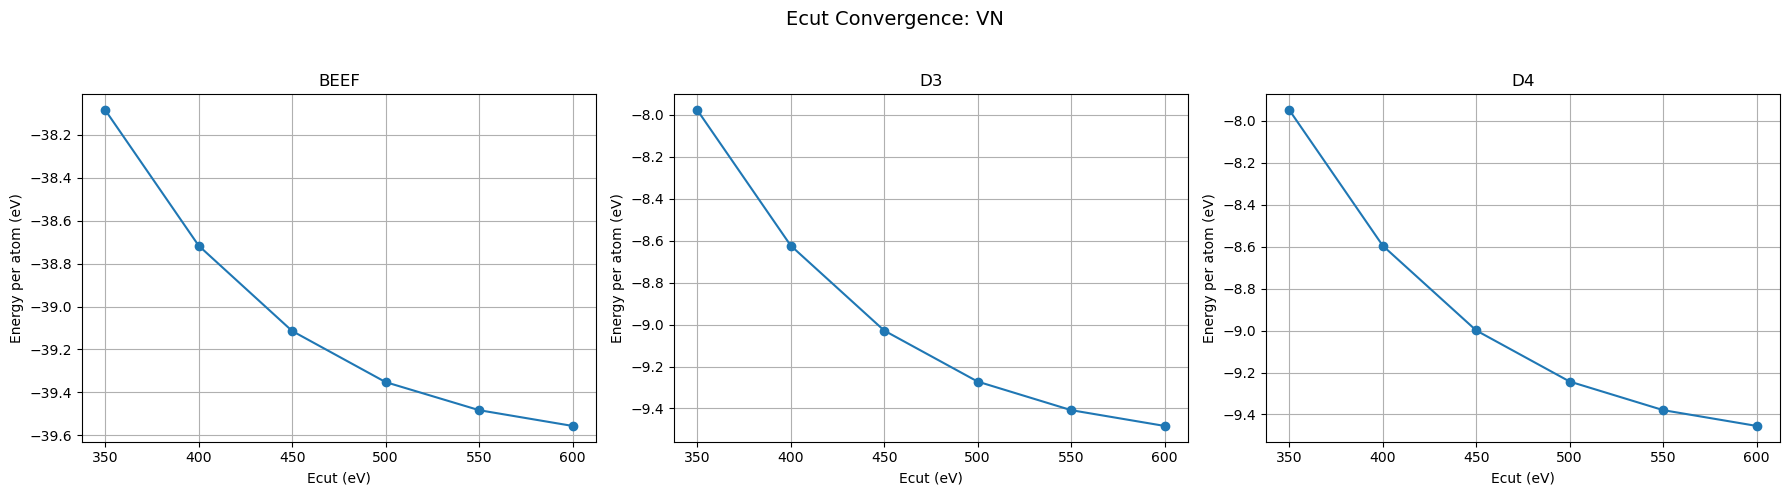

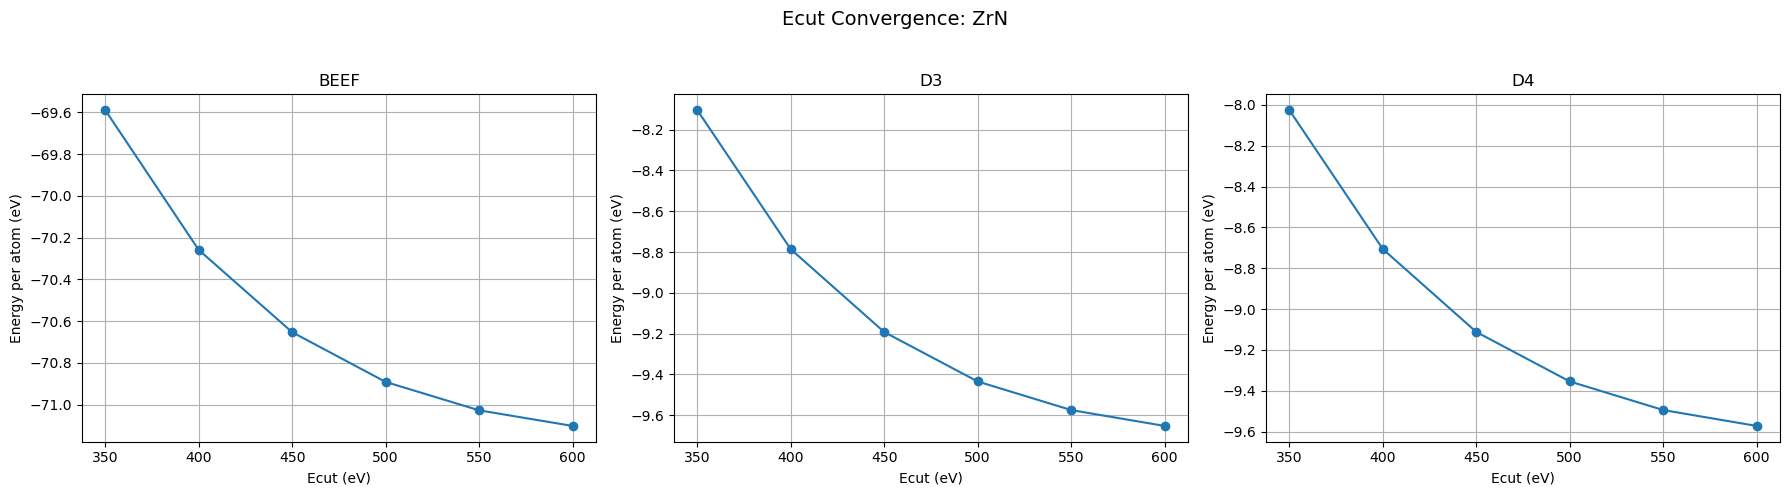

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# Correcting the filename parsing based on new pattern: {metal}_{functional}_kpoints_convergence.csv

# Adjust the plot script to compute Energy_per_atom using a fixed number of atoms = 64

# Recollect CSVs using correct pattern
csv_files = sorted(glob("*_ecut_convergence.csv"))

# Organize data by metal
data_by_metal = {}
n_atoms = 64  # fixed for all structures

for file in csv_files:
    filename = os.path.basename(file).replace('_ecut_convergence.csv', '')
    metal, functional = filename.split('_', 1)  # metal is before first '_', functional is rest
    df = pd.read_csv(file)
    df['Functional'] = functional
    df['Energy_per_atom'] = df['Energy (eV)'] / n_atoms

    if metal not in data_by_metal:
        data_by_metal[metal] = []
    data_by_metal[metal].append(df)

# Plot with independent y-axes and smaller axis fonts
for metal, dfs in data_by_metal.items():
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
    fig.suptitle(f'Ecut Convergence: {metal}', fontsize=14)

    for i, df in enumerate(dfs[:3]):
        ax = axes[i]
        label = df['Functional'].iloc[0]
        ax.plot(df['Ecut (eV)'], df['Energy_per_atom'], marker='o')
        ax.set_title(f'{label}', fontsize=12)
        ax.set_xlabel('Ecut (eV)', fontsize=10)
        ax.set_ylabel('Energy per atom (eV)', fontsize=10)
        ax.tick_params(axis='both', labelsize=10)
        ax.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()




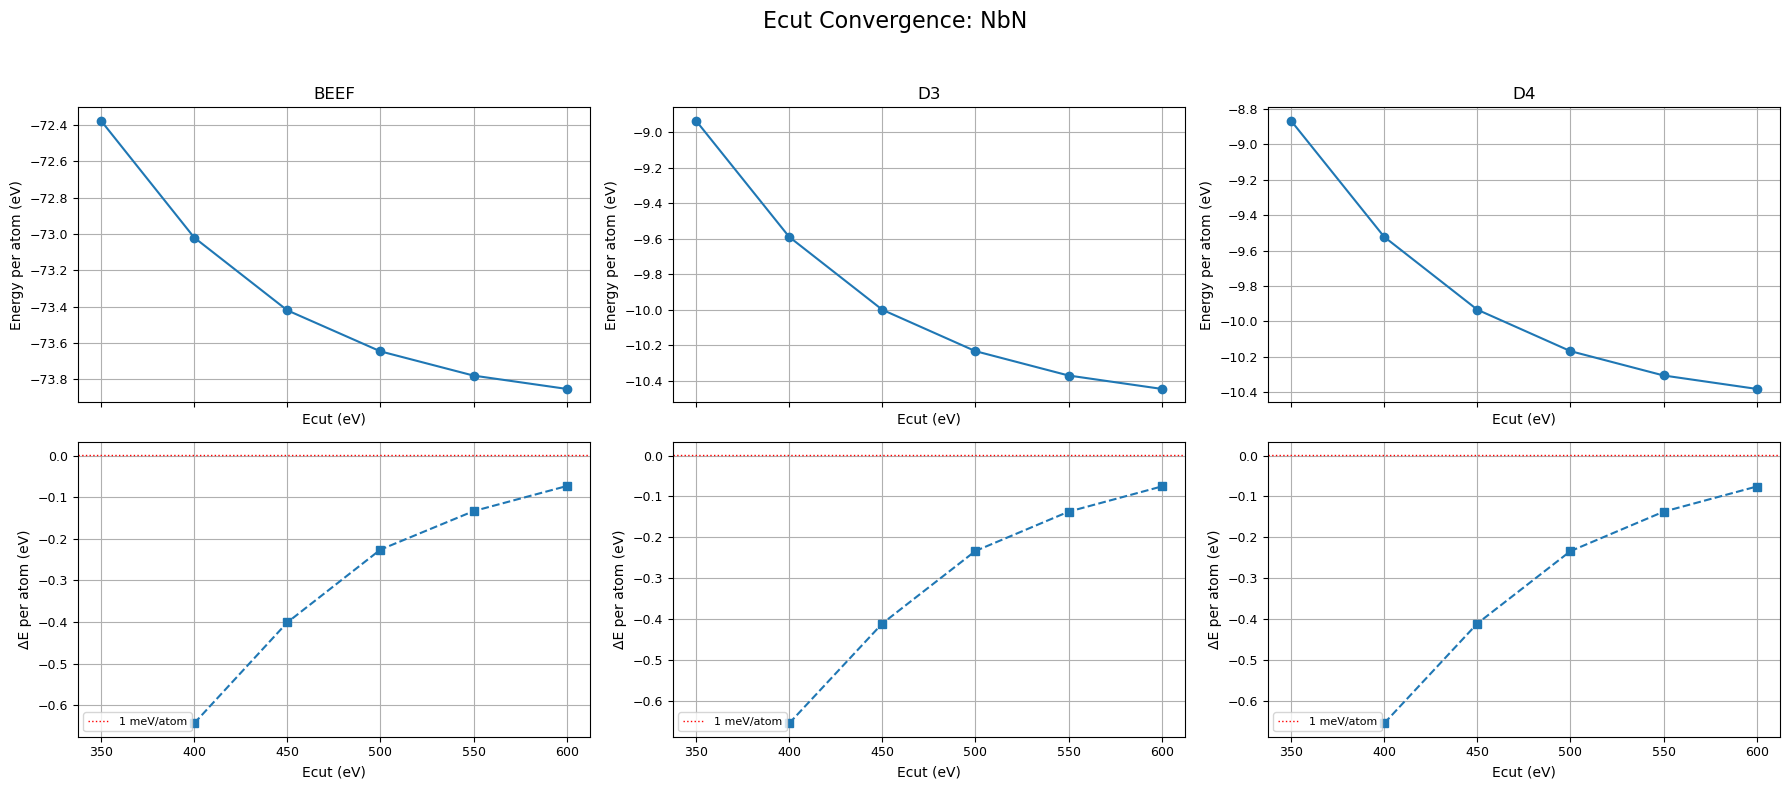

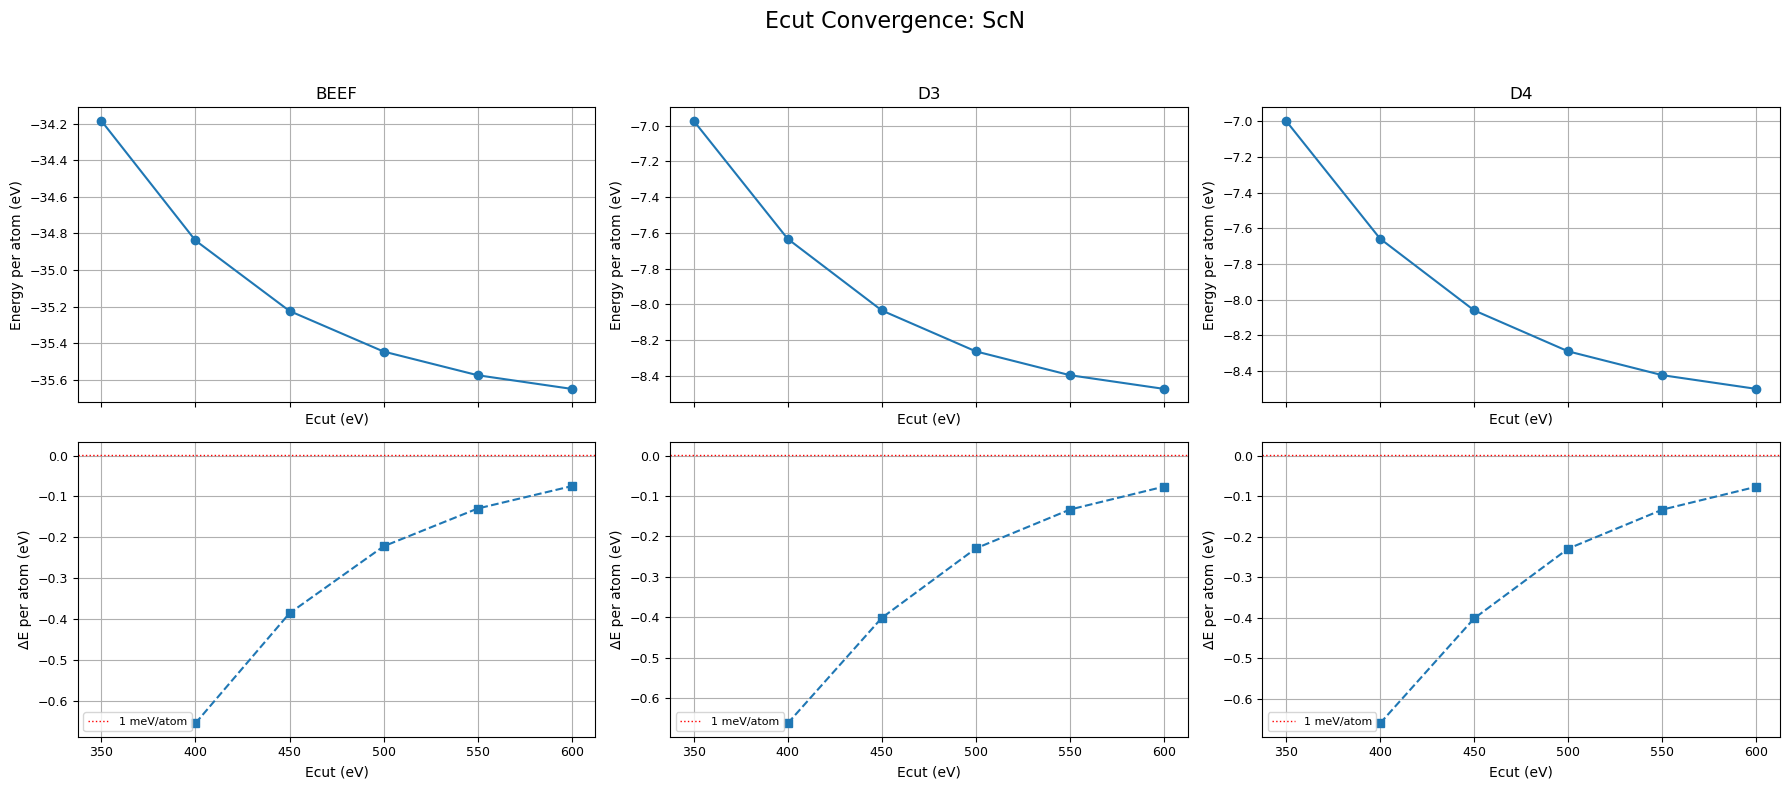

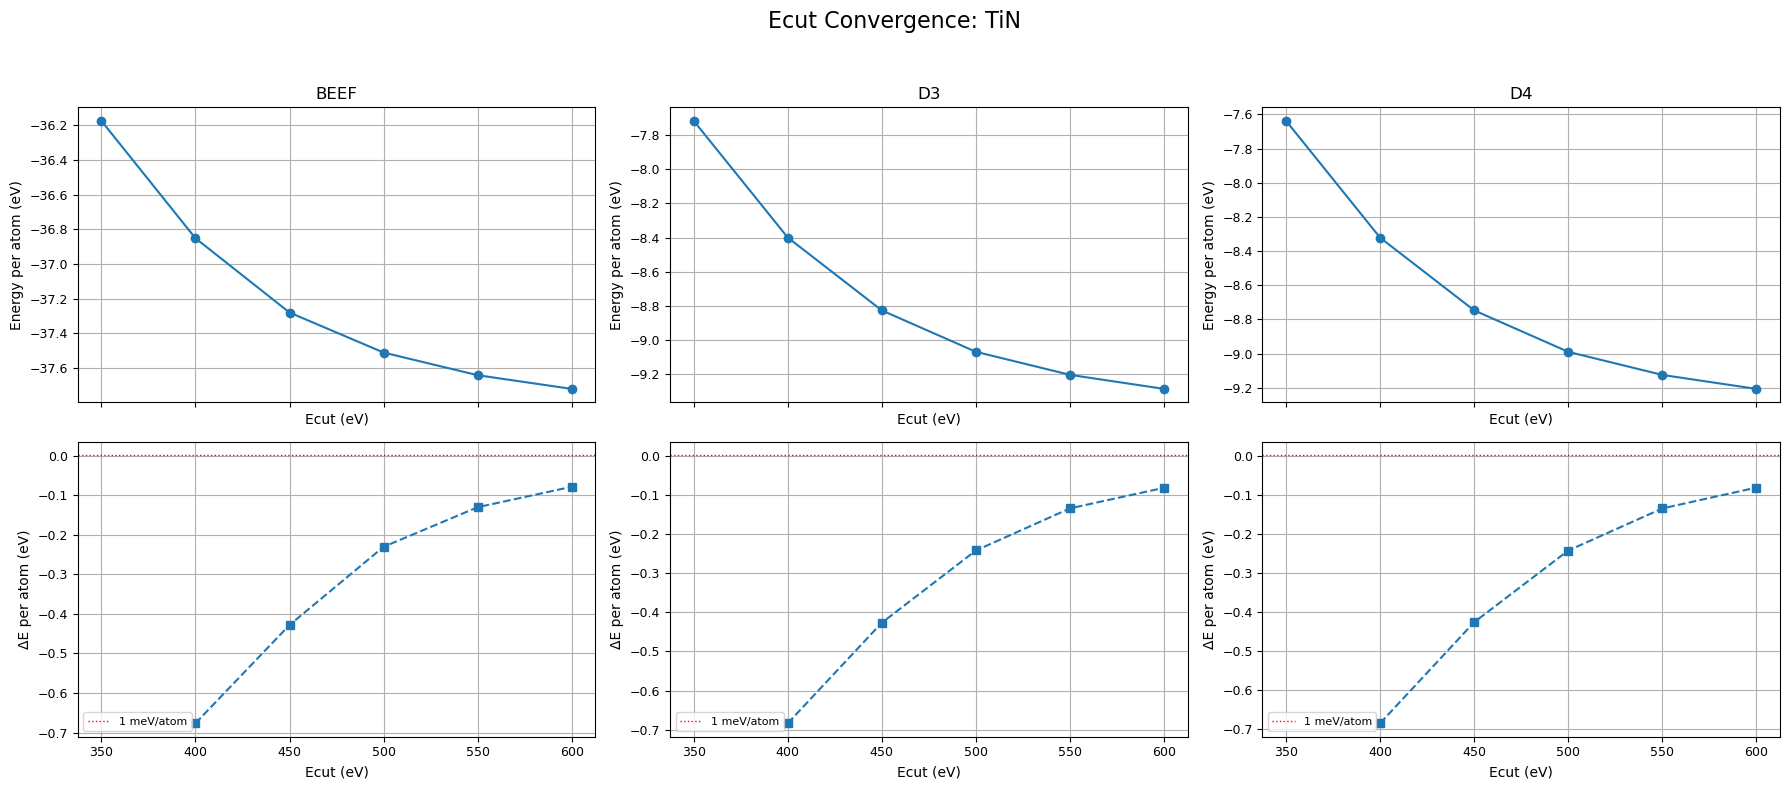

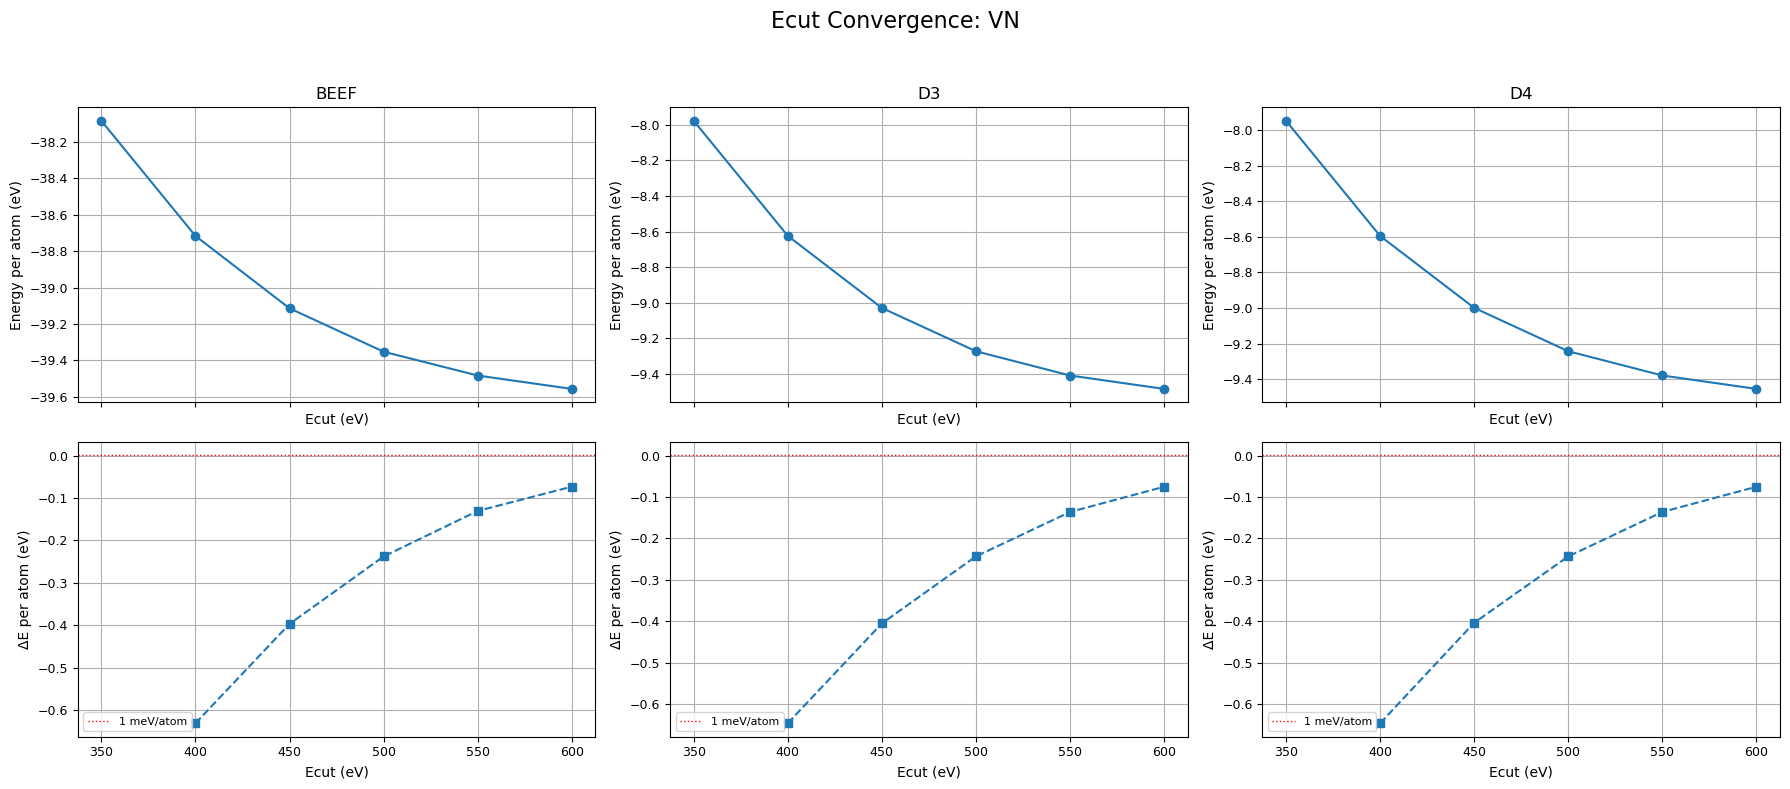

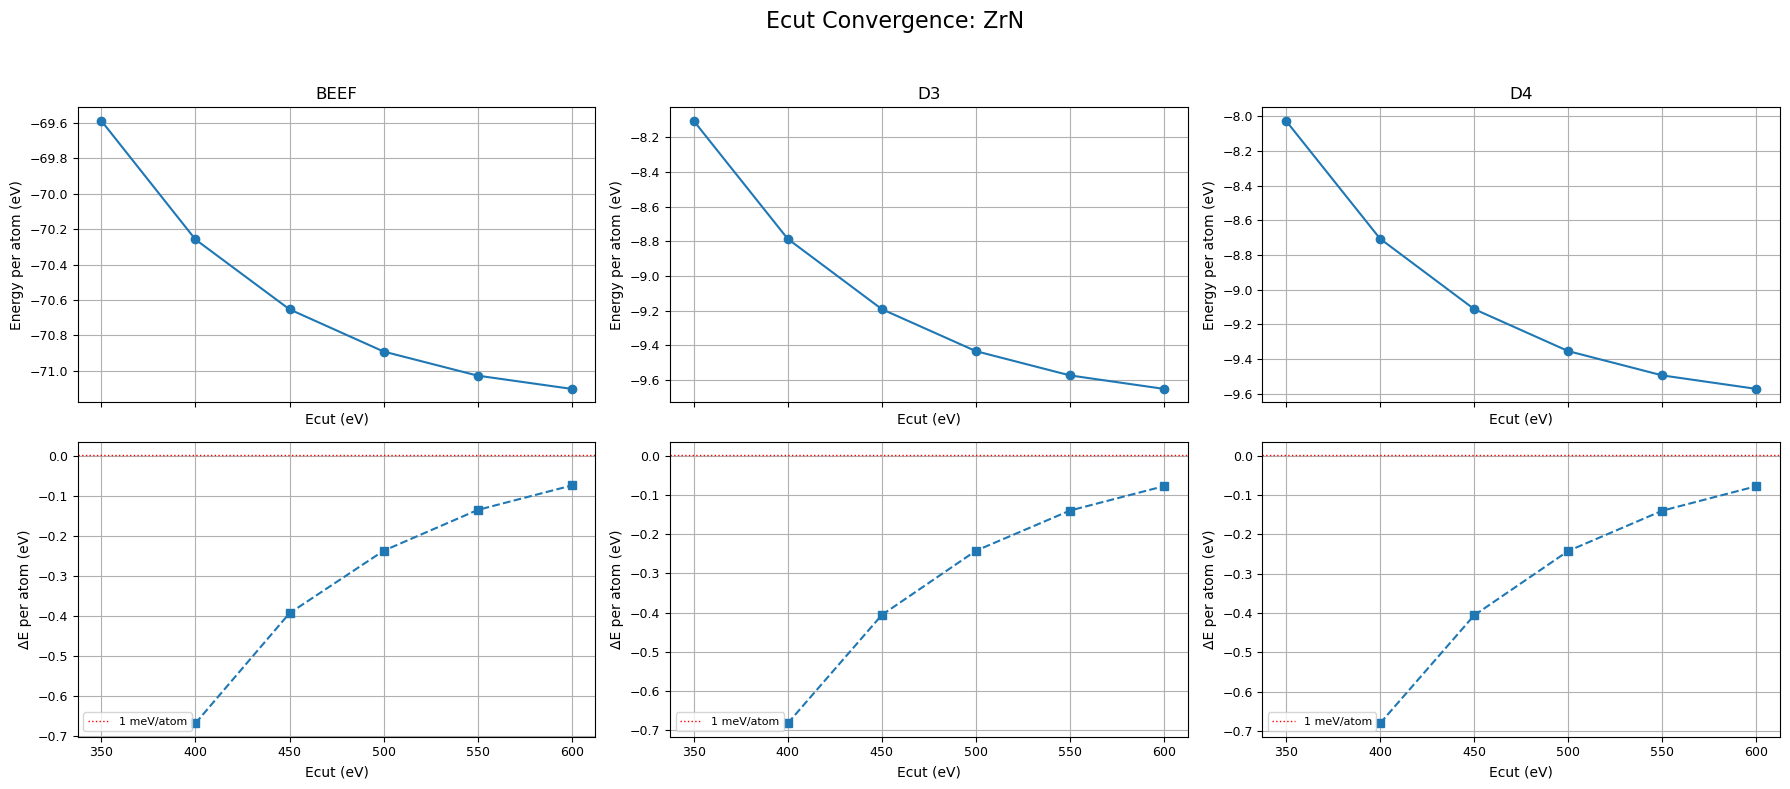

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# ======= CONFIGURATION =======
n_atoms = 64  # number of atoms per unit cell
csv_files = sorted(glob("*_ecut_convergence.csv"))

# ======= LOAD & ORGANIZE DATA =======
data_by_metal = {}

for file in csv_files:
    filename = os.path.basename(file).replace('_ecut_convergence.csv', '')
    metal, functional = filename.split('_', 1)

    df = pd.read_csv(file)
    df['Functional'] = functional
    df['Energy_per_atom'] = df['Energy (eV)'] / n_atoms
    df = df.sort_values(by='Ecut (eV)').reset_index(drop=True)
    df['ΔE_per_atom'] = df['Energy_per_atom'].diff()

    if metal not in data_by_metal:
        data_by_metal[metal] = []
    data_by_metal[metal].append(df)

# ======= PLOT ENERGY AND DELTA ENERGY =======
for metal, dfs in data_by_metal.items():
    fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex='col', sharey=False)
    fig.suptitle(f'Ecut Convergence: {metal}', fontsize=16)

    for i, df in enumerate(dfs[:3]):
        functional = df['Functional'].iloc[0]

        # Plot Energy per Atom
        ax1 = axes[0, i]
        ax1.plot(df['Ecut (eV)'], df['Energy_per_atom'], marker='o')
        ax1.set_title(f'{functional}', fontsize=12)
        ax1.set_ylabel('Energy per atom (eV)', fontsize=10)
        ax1.set_xlabel('Ecut (eV)', fontsize=10)
        ax1.tick_params(axis='both', labelsize=9)
        ax1.grid(True)

        # Plot ΔE per Atom
        ax2 = axes[1, i]
        ax2.plot(df['Ecut (eV)'], df['ΔE_per_atom'], marker='s', linestyle='--')
        ax2.axhline(0.001, color='red', linestyle=':', linewidth=1, label='1 meV/atom')  # <-- ADD THIS
        ax2.set_ylabel('ΔE per atom (eV)', fontsize=10)
        ax2.set_xlabel('Ecut (eV)', fontsize=10)
        ax2.tick_params(axis='both', labelsize=9)
        ax2.grid(True)
        ax2.legend(fontsize=8, loc='best')  # Optional: add legend for the red line


    # Add subplot labels
    axes[0, 0].set_ylabel('Energy per atom (eV)', fontsize=10)
    axes[1, 0].set_ylabel('ΔE per atom (eV)', fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
